In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# 한글 시각화를 위한 seaborn 폰트설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [66]:
aisles = pd.read_csv("aisles.csv")
dep = pd.read_csv("departments.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
product = pd.read_csv("products.csv")
submission = pd.read_csv("sample_submission.csv")

In [67]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [68]:
dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [87]:
print(prior.shape)
prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [70]:
order.head()ㅜㅜㅝㅜㅏjnjh mhv

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [71]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [86]:
print(train.shape)
train

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [88]:
train[train["order_id"] == 1]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1


In [72]:
item_info = pd.merge(product, aisles, on ="aisle_id")
item_info.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [73]:
item_info = pd.merge(item_info, dep, on="department_id")
item_info.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


In [74]:
order_total = pd.merge (prior, order, on="order_id")
order_total.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [75]:
df = pd.merge(item_info, order_total, on="product_id")
df       

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1,196224,prior,65,1,14,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1,138499,prior,8,0,14,7.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0,79603,prior,2,2,10,30.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0,50005,prior,1,1,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3054471,19,1,157473,prior,14,0,18,6.0
32434485,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3136178,12,0,51953,prior,3,5,15,17.0
32434486,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3174062,10,0,23556,prior,14,3,12,15.0
32434487,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3220368,16,0,172793,prior,24,0,14,3.0


In [76]:
df.isnull().sum()

product_id                      0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
order_id                        0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [77]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [78]:
df.rename(columns={'product_id' : '제품번호', 'product_name' : '제품명', 'aisle_id' : '통로번호', 'department_id': '부서번호', 'department' : '카테고리', 'aisle' : '통로이름', 'order_id': '주문번호'}, inplace = True)
df.head()

,제품번호,제품명,통로번호,부서번호,통로이름,카테고리,주문번호,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1,196224,prior,65,1,14,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1,138499,prior,8,0,14,7.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0,79603,prior,2,2,10,30.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0,50005,prior,1,1,15,NaN


In [79]:
df = df.drop(['제품번호','통로번호','부서번호'], axis = 1)
df.head()
df.shape

(32434489, 12)

In [80]:
df.groupby("user_id")["days_since_prior_order"].mean()

user_id
1         20.259259
2         15.967033
3         11.487179
4         15.357143
5         14.500000
            ...    
206205    20.666667
206206     4.042705
206207    14.879397
206208     7.442105
206209    20.275862
Name: days_since_prior_order, Length: 206209, dtype: float64

In [81]:
# 실수가 아닌 정수형들임
df['days_since_prior_order'].unique()

array([ 7.,  1., 30., nan,  8., 14., 24.,  6.,  9.,  5., 20.,  0., 15.,
       25., 16., 23., 26., 10., 28., 17., 22., 19.,  3.,  2., 18., 11.,
       12., 13.,  4., 21., 27., 29.])

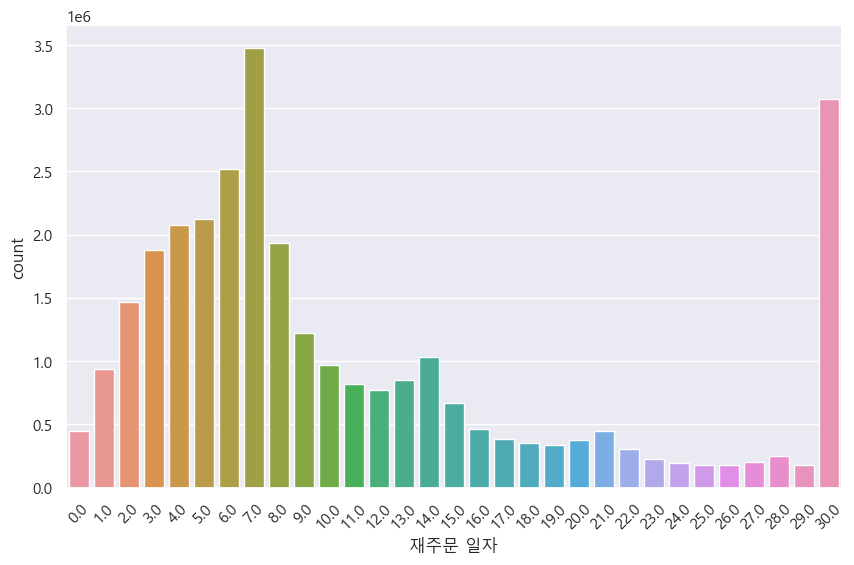

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'days_since_prior_order')
plt.xlabel('재주문 일자')
plt.xticks(rotation=45)
plt.show()

In [82]:
.